In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso 

/var/folders/2g/lgqxddy17rb530lgfvfz7dl40000gn/T/ipykernel_4658/2085414200.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('../reference_material/oslo.tif')


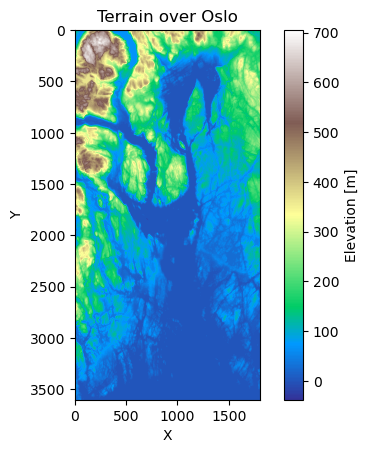

In [2]:
COLORMAP = "terrain"  # color map for countour plots

# Load the terrain
terrain = imread('../reference_material/oslo.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Oslo')
plt.imshow(terrain, cmap=COLORMAP)
plt.colorbar(label="Elevation [m]")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

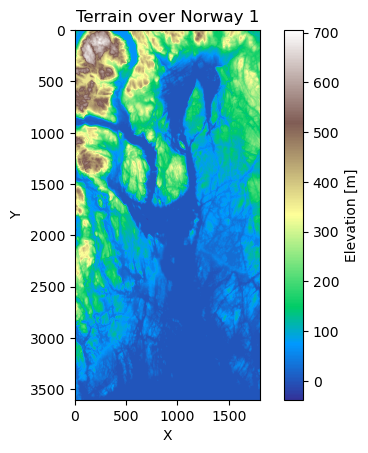

In [3]:
"""Extracting a square piece of the terrain"""

N = 1000
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain[:N,:N]
#X = create_X(x_mesh, y_mesh,5)


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap=COLORMAP)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label="Elevation [m]")
plt.show()

In [4]:

def MSE(y_actual, y_model):
    """Returns the mean squared error of the two arrays."""
    y_actual, y_model = y_actual.ravel(), y_model.ravel()  # flatten arrays
    return np.mean((y_actual - y_model)**2)


def R2_score(y_actual, y_model):
    """Returns the R2 score of the two arrays."""
    y_actual, y_model = y_actual.ravel(), y_model.ravel()  # flatten arrays
    return 1 - np.sum((y_actual - y_model)**2) / np.sum((y_actual - np.mean(y_actual))**2)


# PARAMETERS
N = 1000  # number of data points
maxdegree = 10  # max polynomial degree for plotting

"""
# Figure output directory
RESULTS_DIR = Path("../results").resolve()
FIGURES_DIR = RESULTS_DIR / "figures"

# Create them if they dont exist
if not RESULTS_DIR.exists():
    RESULTS_DIR.mkdir()

if not FIGURES_DIR.exists():
    FIGURES_DIR.mkdir()
"""
# Creates mesh of image pixels
x = np.linspace(0, 1, np.shape(terrain)[0])
y = np.linspace(0, 1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)
z = terrain[:N, :N]
# z = terrain.reshape(-1,1)
# x_mesh = x_mesh.reshape(-1,1)   ###### Lasse: ?? nå har x_mesh og y_mesh forskjellige sizes, gir ikke mening/ ikke tenk på det - Parham

# Initialize scaler
scaler = StandardScaler()

degrees = np.arange(0, maxdegree, 1)
train_mse = np.empty(degrees.shape)
test_mse = np.empty_like(train_mse)
train_r2 = np.empty_like(train_mse)
test_r2 = np.empty_like(train_mse)

# Iterate through all the different polynomial degrees
for degree in degrees:
    # tell the model what degree of polynomial we want
    polynomial_model = PolynomialFeatures(degree)

    # use the package to create a design matrix for a second degree polynomial
    # by converting x to a column vector 
    X = polynomial_model.fit_transform(x_mesh, y_mesh)

    # Split in training and test data up to the given degree
    X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=0.3)

    # Scale data
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Ordinary least squares linear regression
    beta = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train
    z_tilde = X_train_scaled @ beta
    z_predict = X_test_scaled @ beta
    
    # Store the MSE and R2 values
    train_mse[degree] = MSE(z_train, z_tilde)
    test_mse[degree] = MSE(z_test, z_predict)
    train_r2[degree] = R2_score(z_train, z_tilde)
    test_r2[degree] = R2_score(z_test, z_predict)

ValueError: Found input variables with inconsistent numbers of samples: [1801, 1000000]